# HELP International: Identifying Countries in Need of Aid

# 1. Introduction

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('ticks')
sns.set_palette('Accent')

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Country-data.csv')

# 2. Exploratory Data Analysis

## 2.1 Data Description

<b> Features: </b>

<ol>
    <li> country: Country name </li>
    <li> child_mort: Corresponds to the death of children under 5 years of age per 1000 live births. Provides insight into country's healthcare. </li>
    <li> exports: Exports of goods and services per capita as a percentage of the GDP per capita </li>
    <li> health: Total health spending per capita. Given as the percentage of GDP per capita </li>
</ol>

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

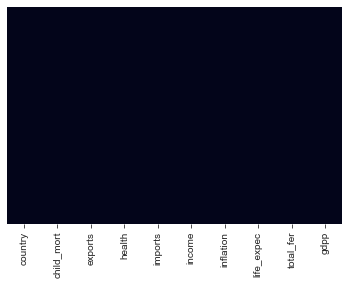

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df['country'].duplicated().any()

False

## 2.2 Data Analysis

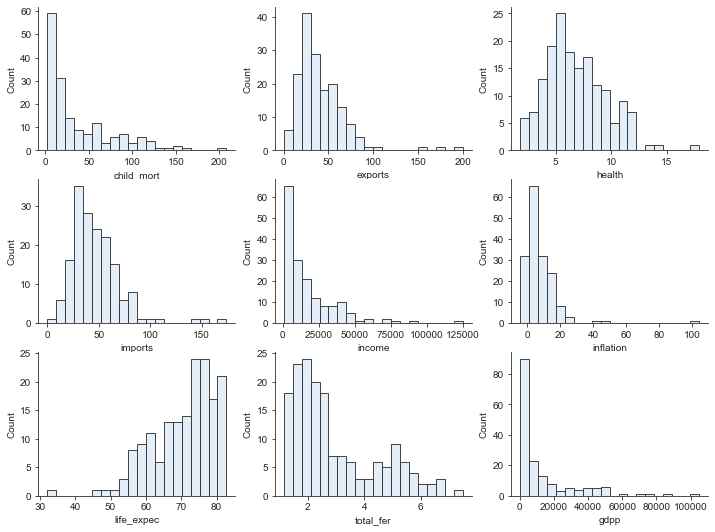

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,9))

sns.histplot(df['child_mort'], ax=ax[0,0], bins=20, edgecolor=".2")
sns.histplot(df['exports'], ax=ax[0,1], bins=20, edgecolor=".2")
sns.histplot(df['health'], ax=ax[0, 2], bins=20, edgecolor=".2")
sns.histplot(df['imports'], ax=ax[1,0], bins=20, edgecolor=".2")
sns.histplot(df['income'], ax=ax[1,1], bins=20, edgecolor=".2")
sns.histplot(df['inflation'], ax=ax[1,2], bins=20, edgecolor=".2")
sns.histplot(df['life_expec'], ax=ax[2,0], bins=20, edgecolor=".2")
sns.histplot(df['total_fer'], ax=ax[2,1], bins=20, edgecolor=".2")
sns.histplot(df['gdpp'], ax=ax[2,2], bins=20, edgecolor=".2")
sns.despine()
plt.show()

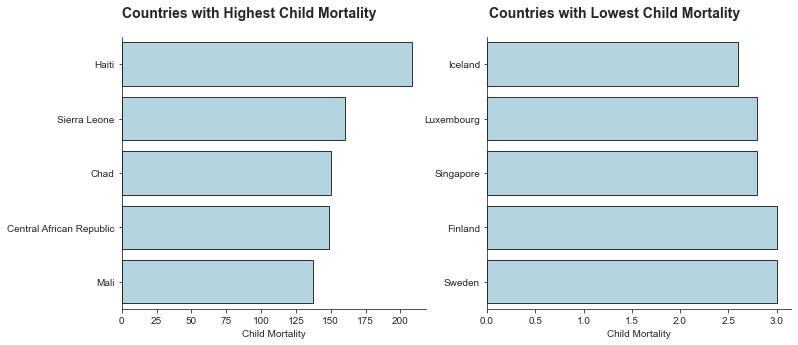

In [10]:
top_child_mort = df.sort_values('child_mort', ascending=False)[0:5]
least_child_mort = df.sort_values('child_mort')[0:5]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x='child_mort', y='country', data=top_child_mort, ax=ax[0], color='lightblue', edgecolor=".2")
ax[0].set(ylabel="", xlabel="Child Mortality")
ax[0].set_title('Countries with Highest Child Mortality',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, x =0.42, y=1.05)

sns.barplot(x='child_mort', y='country', data=least_child_mort, ax=ax[1], color='lightblue', edgecolor=".2")
ax[1].set(ylabel="", xlabel="Child Mortality")
ax[1].set_title('Countries with Lowest Child Mortality', {'fontsize': 14, 'fontweight':'bold'}, x =0.42, y=1.05)
sns.despine()

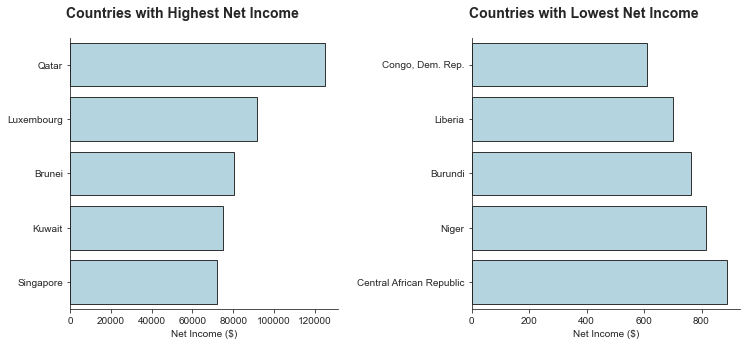

In [11]:
top_net_income = df.sort_values('income', ascending=False)[0:5]
least_net_income = df.sort_values('income')[0:5]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.5)

sns.barplot(x='income', y='country', data=top_net_income, ax=ax[0], color='lightblue', edgecolor=".2")
ax[0].set(ylabel="", xlabel="Net Income ($)")
ax[0].set_title('Countries with Highest Net Income',fontdict= { 'fontsize': 14, 'fontweight':'bold'}, x =0.42, y=1.05)

sns.barplot(x='income', y='country', data=least_net_income, ax=ax[1], color='lightblue', edgecolor=".2")
ax[1].set(ylabel="", xlabel="Net Income ($)")
ax[1].set_title('Countries with Lowest Net Income', {'fontsize': 14, 'fontweight':'bold'}, x =0.42, y=1.05)
sns.despine()

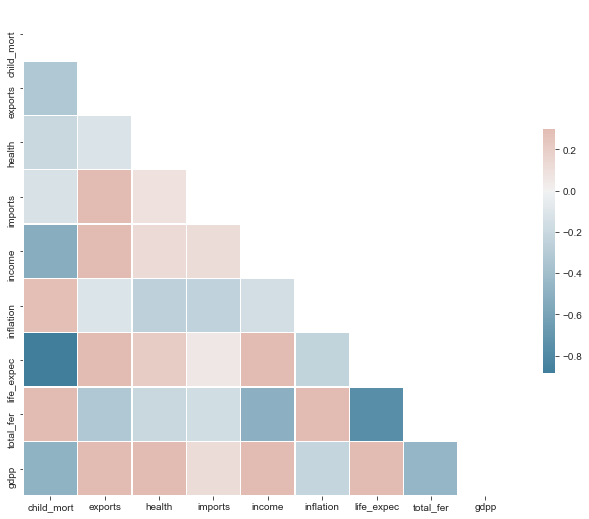

In [12]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

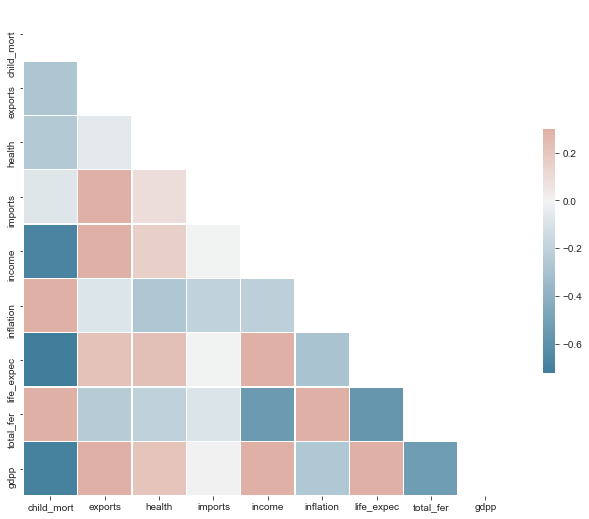

In [17]:
corr = df.corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Conclusion: Drop child mortality and total fertility because they are highly correlated to life expectancy. 

# 3. Clustering Analysis

In [118]:
def plot_distortions(data, num_clusters=10):
    distortions = []
    for cluster in range(1, num_clusters+1):
        km = KMeans(n_clusters=cluster, init='k-means++', n_init=10, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
        
    sns.lineplot(x=range(1, num_clusters+1), y=distortions, marker='o', color='lightblue')
    sns.despine()
    plt.show()

In [125]:
country_data = df.drop(['child_mort', 'total_fer', 'country'], axis=1)
country_data.head()

,exports,health,imports,income,inflation,life_expec,gdpp
0,10.0,7.58,44.9,1610,9.44,56.2,553
1,28.0,6.55,48.6,9930,4.49,76.3,4090
2,38.4,4.17,31.4,12900,16.10,76.5,4460
3,62.3,2.85,42.9,5900,22.40,60.1,3530
4,45.5,6.03,58.9,19100,1.44,76.8,12200


In [124]:
scaler = StandardScaler()
scaler.fit(country_data)
scaled_data = scaler.fit_transform(country_data)

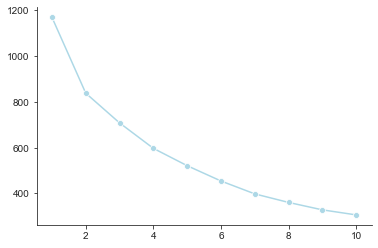

In [114]:
plot_distortions(scaled_data)

In [109]:
country_km = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0)
country_km_data = country_km.fit_predict(scaled_data)

In [127]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [111]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = country_km_data
pca_df.head()

,PC1,PC2,cluster
0,-1.898699,-0.066763,1
1,-0.284457,-0.175963,1
2,-0.619015,-0.119278,1
3,-1.360786,1.396478,1
4,0.600146,0.313098,1


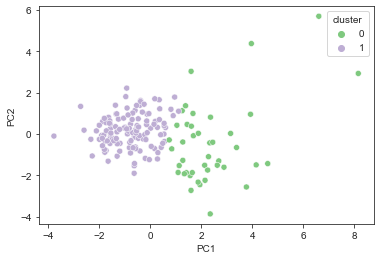

In [115]:
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='cluster')
plt.show()

In [119]:
scree_pca = PCA()
scree_plot = scree_pca.fit_transform(scaled_data)
scree_df = pd.DataFrame({'var': scree_pca.explained_variance_ratio_ * 100, 'PC': [i for i in range(1, len(country_data.columns)+1)]})

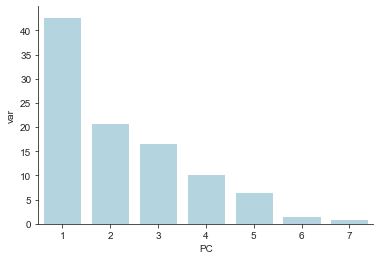

In [120]:
sns.barplot(x='PC', y='var', data=scree_df, color='lightblue')
sns.despine()
plt.show()

In [129]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=list(country_data.columns))
loadings_df

,PC1,PC2
exports,0.694409,0.662200
health,0.317819,-0.438960
imports,0.443744,0.785944
income,0.876736,-0.183272
inflation,-0.383771,0.033403
life_expec,0.735289,-0.308912
gdpp,0.882692,-0.304122


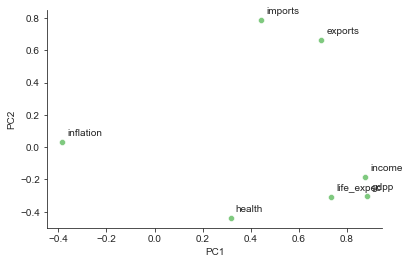

In [138]:
annotations = list(country_data.columns)
sns.scatterplot(x='PC1', y='PC2', data=loadings_df)

for i in range(len(annotations)):
    plt.text(loadings_df.iloc[i]['PC1']+0.02, loadings_df.iloc[i]['PC2']+0.04, annotations[i])

sns.despine()
plt.show()